In [1]:
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    VotingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Accuracy: 0.9474
Random Forest Accuracy: 0.9474
AdaBoost Accuracy: 0.9561
Gradient Boosting Accuracy: 0.9561


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Accuracy: 0.9561


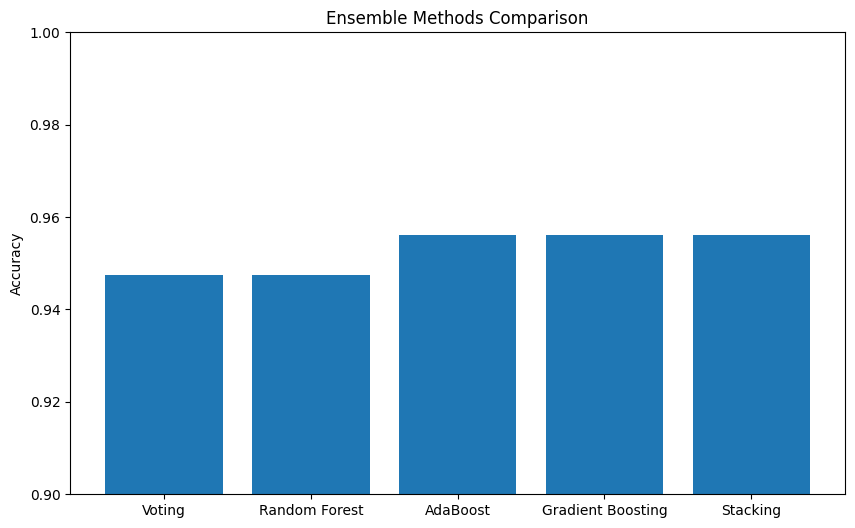


Best Model: AdaBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



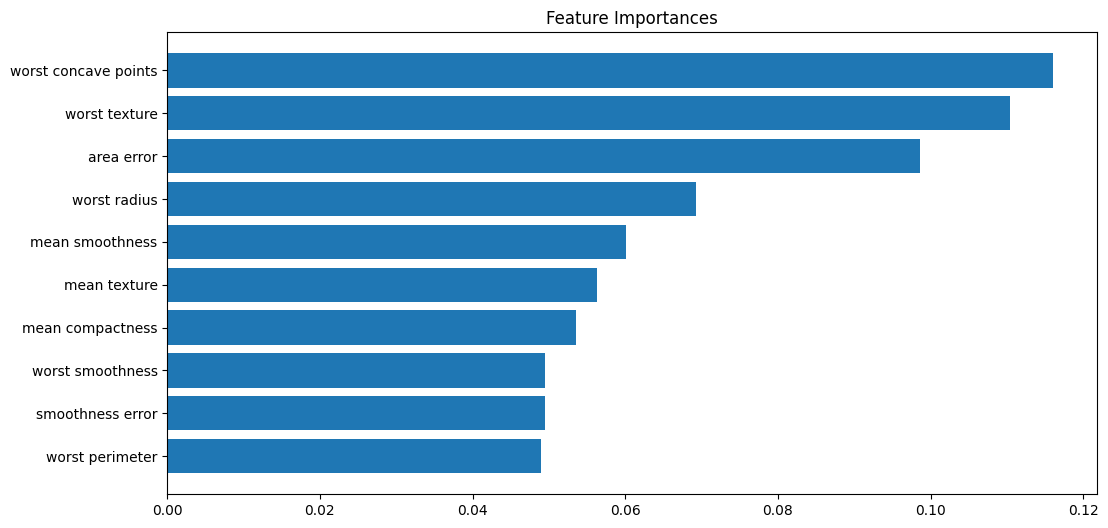

In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_clf = LogisticRegression(max_iter=1000, random_state=42)
svm_clf = SVC(probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('svc', svm_clf),
        ('rf', rf_clf)
    ],
    voting='soft'
)

bagging_clf = RandomForestClassifier(
    n_estimators=500,
    max_features=0.8,
    random_state=42
)

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', log_clf),
        ('svc', svm_clf),
        ('rf', rf_clf)
    ],
    final_estimator=LogisticRegression(),
    stack_method='predict_proba'
)

models = {
    "Voting": voting_clf,
    "Random Forest": bagging_clf,
    "AdaBoost": ada_clf,
    "Gradient Boosting": gb_clf,
    "Stacking": stacking_clf
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title("Ensemble Methods Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

print(f"\nBest Model: {best_model_name}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(12, 6))
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[-10:]  # Top 10 features
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.show()